In [231]:
import os
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import requests
import SimpleITK as sitk
import pathlib

In [3]:
import os
import pandas as pd
import numpy as np
import anndata
import time
import matplotlib.pyplot as plt
import json
import requests
import pickle
import gzip as gz

import sys
sys.path.insert(1, '/home/jw3514/Work/CellType_Psy/src/')
from CellType_PSY import *

/home/jw3514/anaconda3/lib/python3.9/site-packages/statsmodels/compat/pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [4]:
## Load CCF Annotations 

In [5]:
CCF2020 = "/home/jw3514/Work/data/Allen_Mouse_Brain_Cell_Atlas/abc_download_root/metadata/Allen-CCF-2020/20230630/"

In [57]:
file = "parcellation_to_parcellation_term_membership_acronym.csv"
parcellation_annotation = pd.read_csv("{}/views/{}".format(CCF2020, file))
parcellation_annotation.set_index('parcellation_index',inplace=True)
parcellation_annotation.columns = ['parcellation_%s'% x for x in  parcellation_annotation.columns]

In [58]:
file = "parcellation_to_parcellation_term_membership_color.csv"
parcellation_color = pd.read_csv("{}/views/{}".format(CCF2020, file))
parcellation_color.set_index('parcellation_index',inplace=True)
parcellation_color.columns = ['parcellation_%s'% x for x in  parcellation_color.columns]

In [59]:
CCF_V3_ontology = pd.read_csv("/home/jw3514/Work/CellType_Psy/AllenBrainCellAtlas/dat/MERFISH/CCF_V3_ISH_MERFISH.csv", index_col=0)

In [60]:
ASD_STR_ISH_Bias = pd.read_csv("/home/jw3514/Work/ASD_Circuits/dat/Unionize_bias/Spark_Meta_EWS.Z2.bias.FDR.csv", 
                               index_col=0)
Structures_ISH = []
for STR in ASD_STR_ISH_Bias.index.values:
    New_Name = STR.replace("_", " ")
    Structures_ISH.append(New_Name)

In [61]:
def Add_ISH_STR(cell_meta, CCF_V3_ontology, Structures_ISH):
    for i, row in cell_meta.iterrows():
        _str = row["parcellation_structure"]
        _substr = row["parcellation_substructure"]
        if _str in CCF_V3_ontology.index.values:
            name_str = CCF_V3_ontology.loc[_str, "CleanName"]
        else:
            name_str = "None"
        if _substr in CCF_V3_ontology.index.values:
            name_substr = CCF_V3_ontology.loc[_substr, "CleanName"]
        else:
            name_substr = "None"
        if name_str in Structures_ISH: # should capture most of them
            ISH_STR = name_str
        elif name_substr in Structures_ISH: # should capture AM IC MG MDRN
            ISH_STR = name_substr
        elif _str in ["VISa", "VISrl"]:
            ISH_STR = "Posterior parietal association areas"
        elif name_str == "Subiculum":
            ISH_STR = "Subiculum"
        else:
            ISH_STR = "Not in Connectome"
        cell_meta.loc[i, "ISH_STR"] = ISH_STR
        cell_meta.loc[i, "ISH_STR2"] = "_".join(ISH_STR.split())
    return cell_meta

### Test

In [70]:
MERFISH_Dir = "/home/jw3514/Work/data/Allen_Mouse_Brain_Cell_Atlas/MERFISH_ZhuangLab/ABCA-4/"
outname = "cell_metadata_with_cluster_str_annotation.csv"

In [71]:
cell_meta = pd.read_csv("{}/cell_metadata_with_cluster_annotation.csv".format(MERFISH_Dir), index_col=0)
cell_meta.rename(columns={'x':'x_section','y':'y_section','z':'z_section'},inplace=True)
cell_coords = pd.read_csv("{}/ccf_coordinates.csv".format(MERFISH_Dir), index_col=0)
cell_coords.rename(columns={'x':'x_ccf','y':'y_ccf','z':'z_ccf'},inplace=True)
cell_meta = cell_meta.join(cell_coords,how='inner')
cell_meta = cell_meta.join(parcellation_annotation,on='parcellation_index')
cell_meta = cell_meta.join(parcellation_color,on='parcellation_index')
cell_meta = Add_ISH_STR(cell_meta, CCF_V3_ontology, Structures_ISH)
cell_meta.to_csv("{}/{}".format(MERFISH_Dir, outname))

In [72]:
MERFISH_Dir = "/home/jw3514/Work/data/Allen_Mouse_Brain_Cell_Atlas/MERFISH_ZhuangLab/ABCA-1/"
outname = "cell_metadata_with_cluster_str_annotation.csv"

cell_meta = pd.read_csv("{}/cell_metadata_with_cluster_annotation.csv".format(MERFISH_Dir), index_col=0)
cell_meta.rename(columns={'x':'x_section','y':'y_section','z':'z_section'},inplace=True)
cell_coords = pd.read_csv("{}/ccf_coordinates.csv".format(MERFISH_Dir), index_col=0)
cell_coords.rename(columns={'x':'x_ccf','y':'y_ccf','z':'z_ccf'},inplace=True)
cell_meta = cell_meta.join(cell_coords,how='inner')
cell_meta = cell_meta.join(parcellation_annotation,on='parcellation_index')
cell_meta = cell_meta.join(parcellation_color,on='parcellation_index')
cell_meta = Add_ISH_STR(cell_meta, CCF_V3_ontology, Structures_ISH)
cell_meta.to_csv("{}/{}".format(MERFISH_Dir, outname))

In [74]:
MERFISH_Dir = "/home/jw3514/Work/data/Allen_Mouse_Brain_Cell_Atlas/MERFISH_ZhuangLab/ABCA-2/"
outname = "cell_metadata_with_cluster_str_annotation.csv"

cell_meta = pd.read_csv("{}/cell_metadata_with_cluster_annotation.csv".format(MERFISH_Dir), index_col=0)
cell_meta.rename(columns={'x':'x_section','y':'y_section','z':'z_section'},inplace=True)
cell_coords = pd.read_csv("{}/ccf_coordinates.csv".format(MERFISH_Dir), index_col=0)
cell_coords.rename(columns={'x':'x_ccf','y':'y_ccf','z':'z_ccf'},inplace=True)
cell_meta = cell_meta.join(cell_coords,how='inner')
cell_meta = cell_meta.join(parcellation_annotation,on='parcellation_index')
cell_meta = cell_meta.join(parcellation_color,on='parcellation_index')
cell_meta = Add_ISH_STR(cell_meta, CCF_V3_ontology, Structures_ISH)
cell_meta.to_csv("{}/{}".format(MERFISH_Dir, outname))

In [75]:
MERFISH_Dir = "/home/jw3514/Work/data/Allen_Mouse_Brain_Cell_Atlas/MERFISH_ZhuangLab/ABCA-3/"
outname = "cell_metadata_with_cluster_str_annotation.csv"

cell_meta = pd.read_csv("{}/cell_metadata_with_cluster_annotation.csv".format(MERFISH_Dir), index_col=0)
cell_meta.rename(columns={'x':'x_section','y':'y_section','z':'z_section'},inplace=True)
cell_coords = pd.read_csv("{}/ccf_coordinates.csv".format(MERFISH_Dir), index_col=0)
cell_coords.rename(columns={'x':'x_ccf','y':'y_ccf','z':'z_ccf'},inplace=True)
cell_meta = cell_meta.join(cell_coords,how='inner')
cell_meta = cell_meta.join(parcellation_annotation,on='parcellation_index')
cell_meta = cell_meta.join(parcellation_color,on='parcellation_index')
cell_meta = Add_ISH_STR(cell_meta, CCF_V3_ontology, Structures_ISH)
cell_meta.to_csv("{}/{}".format(MERFISH_Dir, outname))

In [86]:
def GetBiasesForSTR(STR, MERFISH_STRAnn, ASD_CT_Bias_Cluster, CT_ID_SET, Non_Neuron_Class):
    STR_MERFISH_DF = MERFISH_STRAnn[MERFISH_STRAnn["ISH_STR"]==STR]
    total_bias = 0
    total_bias_neuro = 0
    N_cell = 0
    N_neuro = 0
    for i, row in STR_MERFISH_DF.iterrows():
        cluster_id = row["cluster"]
        if cluster_id not in CT_ID_SET:
            continue
        class_id = row["class"]
        asd_cluster_bias = ASD_CT_Bias_Cluster.loc[cluster_id, "EFFECT"]
        if asd_cluster_bias == asd_cluster_bias:
            total_bias += asd_cluster_bias
            N_cell += 1
            if class_id not in Non_Neuron_Class:
                total_bias_neuro += asd_cluster_bias
                N_neuro += 1
    if N_cell > 0:
        bias_per_cell = total_bias/N_cell
    else:
        bias_per_cell = 0
    if N_neuro > 0:
        bias_per_neuro = total_bias_neuro/N_neuro
    else:
        bias_per_neuro = 0
    Vol = CCF_V3_STR.loc[STR, "total_voxel_counts (10 um)"]
    bias_per_Vol = total_bias/Vol * 100
    return bias_per_cell, bias_per_neuro, bias_per_Vol
#STRs = list(set(MERFISH_STRAnn["ISH_STR"]))
#STRs.remove("Not in Connectome")
#CT_ID_SET = set(ASD_ClusterV3_Bias.index.values)
Non_Neuron_Class = ["30 Astro-Epen","31 OPC-Oligo","32 OEC","33 Vascular","34 Immune"]
CCF_V3_STR = pd.read_csv("/home/jw3514/Work/CellType_Psy/AllenBrainCellAtlas/dat/MERFISH/CCF_V3_ISH_MERFISH.csv",
                        index_col="CleanName")

In [80]:
MERFISH_Dir1 = "/home/jw3514/Work/data/Allen_Mouse_Brain_Cell_Atlas/MERFISH_ZhuangLab/ABCA-1/"
MERFISH_Dir2 = "/home/jw3514/Work/data/Allen_Mouse_Brain_Cell_Atlas/MERFISH_ZhuangLab/ABCA-2/"
MERFISH_Dir3 = "/home/jw3514/Work/data/Allen_Mouse_Brain_Cell_Atlas/MERFISH_ZhuangLab/ABCA-3/"
MERFISH_Dir4 = "/home/jw3514/Work/data/Allen_Mouse_Brain_Cell_Atlas/MERFISH_ZhuangLab/ABCA-4/"
MERFISH1 = pd.read_csv("{}/{}".format(MERFISH_Dir1, outname))
MERFISH2 = pd.read_csv("{}/{}".format(MERFISH_Dir2, outname))
MERFISH3 = pd.read_csv("{}/{}".format(MERFISH_Dir3, outname))
MERFISH4 = pd.read_csv("{}/{}".format(MERFISH_Dir4, outname))

In [84]:
print(MERFISH1.shape)
print(MERFISH2.shape)
print(MERFISH3.shape)
print(MERFISH4.shape)

(2616328, 39)
(1056520, 39)
(1566842, 39)
(162361, 39)


In [81]:
MERFISH_Combine = pd.concat([MERFISH1, MERFISH2, MERFISH3, MERFISH4])

In [174]:
MERFISH_Combine.to_csv("dat/MERFISH_Zhuang/MERFISH_Zhuang_1-4_Combine.STR.Annot.csv")

In [82]:
ASD_ClusterV3_Bias = pd.read_csv("dat/Bias/ASD.ClusterV3.top60.DN.Z2.csv", index_col=0)
STRs = list(set(MERFISH1["ISH_STR"]))
STRs.remove("Not in Connectome")
CT_ID_SET = set(ASD_ClusterV3_Bias.index.values)

#### test with cell meta 4

In [87]:
bias_dat_percell = []
bias_dat_perneuro = []
bias_dat_pervol = []
for STR in STRs:
    bias_percell, bias_per_neuro, bias_per_vol = GetBiasesForSTR(STR, MERFISH2, ASD_ClusterV3_Bias,
                                                                 CT_ID_SET, Non_Neuron_Class)
    bias_dat_percell.append(bias_percell)
    bias_dat_perneuro.append(bias_per_neuro)
    bias_dat_pervol.append(bias_per_vol)
    print(STR, bias_percell, bias_per_neuro, bias_per_vol)

Anteromedial nucleus ventral part -0.15852298564517195 -0.007907362218202046 -0.0366880767729821
Substantia innominata -0.028034972965051964 0.22631181323494154 -0.00478160588106959
Primary somatosensory area mouth 0.05389204727708635 0.23509737282626925 0.010152459716494023
Ventral tegmental area -0.2213303603076673 -0.31058127822988685 -0.049520975678821924
Posterolateral visual area 0.04843228731080594 0.24764637510760695 0.009705160623463188
Midbrain reticular nucleus -0.2106244281686726 -0.18930308907549515 -0.03686460682443944
Dorsal cochlear nucleus -0.10908044331785989 -0.03798998155600709 -0.02209419037598192
Ectorhinal area 0.06960092992981169 0.2462275290584596 0.008422493065483292
Nucleus of the optic tract -0.12721050536611 0.1206473958366952 -0.02519694164103892
Posterior complex of the thalamus -0.17554917476915557 -0.1246795749077931 -0.016621294063810237
Posterior parietal association areas 0.07722921064676774 0.26904400623226593 0.011240984605875602
Lateral hypothalam

Periaqueductal gray -0.15364461169306842 -0.1465740211557552 -0.04074675925893853
Posterior amygdalar nucleus 0.097509717952909 0.29231410597715696 0.017582168501364532
Caudoputamen 0.1350118442507908 0.38276972028128436 0.03138888375805077
Temporal association areas 0.07948741273308821 0.2654179359503004 0.010986816343565228
Diagonal band nucleus -0.16144784392937686 -0.13339726087482945 -0.033383500269206716
Periventricular hypothalamic nucleus posterior part -0.19221840343135094 0.054007281055373925 -0.01774684596300949
Lateral visual area 0.11836344293061868 0.30724956917740226 0.023187423424836283
Anterodorsal nucleus -0.30004688607953983 -0.48192285614844893 -0.11509178320763906
Prelimbic area 0.015224414921301667 0.22026804187794813 0.003101857107353744
Rhomboid nucleus -0.09176097195718057 -0.06953826456296847 -0.023371760559804076
Nucleus of the solitary tract -0.20554964935983885 -0.16708211332125672 -0.0006780396242908444
Primary visual area 0.14724235047648765 0.33121976716

Pyramus VIII 0 0 0.0
Anteroventral nucleus of thalamus -0.1821894264184108 -0.18055527654718997 -0.040812493622664946
Superior vestibular nucleus -0.22524780986484663 -0.3367535198590019 -0.04693538365660485
Facial motor nucleus -0.2277967890550434 -0.4670303010911415 -0.04496816310970561
Ventral posterolateral nucleus of the thalamus -0.21884560228366304 -0.26006103355662125 -0.03541320382196463
Spinal nucleus of the trigeminal oral part -0.2161931579862717 -0.15156924862868298 -0.028532974974351626
Parasubiculum -0.028445476491118473 0.14277012349552698 -0.006610717076304337
Mediodorsal nucleus of thalamus -0.15391524137298934 -0.1684086887438937 -0.023498000547911544
Primary somatosensory area lower limb 0.044381718664496445 0.21802816916405937 0.011253332947089434
Subthalamic nucleus -0.23181183327174423 -0.30552946341767884 -0.04300312014958873
Intermediodorsal nucleus of the thalamus -0.1282164667052355 -0.1528409420380374 -0.027037313992601102
Medullary reticular nucleus ventral

In [103]:
AggV2_ASD_DF_MERFISH2 = pd.DataFrame(data={"STR2":STRs, "EFFECT_perCell":bias_dat_percell, "EFFECT_perNeuro":bias_dat_perneuro,
                                 "EFFECT_perVol":bias_dat_pervol, })
AggV2_ASD_DF_MERFISH2 = AggV2_ASD_DF_MERFISH2.set_index("STR2")

In [92]:
ASD_ISH = pd.read_csv("dat/Bias/ASD.ISH.bias.csv", index_col=0)
ASD_MERFISH_adj = pd.read_csv("dat/Bias/ASD.MERFISH.Agg.adj.bias.csv", index_col=0)

In [101]:
for i, row in AggV2_ASD_DF.iterrows():
    
    STR = "_".join(i.split())
    if STR not in ASD_MERFISH_adj.index.values:
        AggV2_ASD_DF.loc[i, "STR"] = ""
        AggV2_ASD_DF.loc[i, "REGION"] = ""
    else:
        REG = ASD_MERFISH_adj.loc[STR, "REGION"]
        AggV2_ASD_DF.loc[i, "STR"] = STR
        AggV2_ASD_DF.loc[i, "REGION"] = REG
    
    
    AggV2_ASD_DF.loc[i, "EFFECT_ISH"] = ASD_ISH.loc[STR, "EFFECT"]
AggV2_ASD_DF = AggV2_ASD_DF.sort_values("EFFECT_perVol", ascending=False)

In [102]:
AggV2_ASD_DF.head(50)

,EFFECT_perCell,EFFECT_perNeuro,EFFECT_perVol,STR,REGION,EFFECT_ISH
STR2,,,,,,
Accessory olfactory bulb,0.253063,0.392303,0.148531,Accessory_olfactory_bulb,Olfactory_areas,0.283606
Main olfactory bulb,0.210172,0.344008,0.099808,Main_olfactory_bulb,Olfactory_areas,0.001685
Presubiculum,0.163770,0.416225,0.079947,Presubiculum,Hippocampus,0.189091
Anterior olfactory nucleus,0.188016,0.405540,0.064156,Anterior_olfactory_nucleus,Olfactory_areas,0.485098
Nucleus accumbens,0.230312,0.399611,0.054337,Nucleus_accumbens,Striatum,0.553718
Olfactory tubercle,0.272725,0.431146,0.050926,Olfactory_tubercle,Striatum,0.193269
Dentate gyrus,0.151626,0.363339,0.049897,Dentate_gyrus,Hippocampus,0.498752
Central lobule,0.141854,0.252361,0.049266,Central_lobule,Cerebellum,-0.113617
Flocculus,0.170320,0.265484,0.039903,Flocculus,Cerebellum,-0.168618


In [94]:
pearsonr(AggV2_ASD_DF["EFFECT_perCell"].values, AggV2_ASD_DF["EFFECT_ISH"].values)

(0.5396765377098126, 2.018609160870983e-17)

In [95]:
pearsonr(AggV2_ASD_DF["EFFECT_perNeuro"].values, AggV2_ASD_DF["EFFECT_ISH"].values)

(0.6424638894944562, 4.521159825365131e-26)

In [96]:
pearsonr(AggV2_ASD_DF["EFFECT_perVol"].values, AggV2_ASD_DF["EFFECT_ISH"].values)

(0.43068227228828526, 5.5190039693782916e-11)

In [97]:
Bias1 = ASD_ISH
Bias2 = AggV2_ASD_DF.sort_values("EFFECT_perNeuro", ascending=False).set_index("STR")
STR_Com = len(set(Bias1.head(50).index.values).intersection(set(Bias2.head(50).index.values)))
STR_Com

19

In [98]:
Bias1 = ASD_ISH
Bias2 = AggV2_ASD_DF.sort_values("EFFECT_perVol", ascending=False).set_index("STR")
STR_Com = len(set(Bias1.head(50).index.values).intersection(set(Bias2.head(50).index.values)))
STR_Com

20

In [99]:
Bias1 = ASD_ISH
Bias2 = AggV2_ASD_DF.sort_values("EFFECT_perCell", ascending=False).set_index("STR")
STR_Com = len(set(Bias1.head(50).index.values).intersection(set(Bias2.head(50).index.values)))
STR_Com

19

# Test on Combine MERFISH

In [104]:
bias_dat_percell = []
bias_dat_perneuro = []
bias_dat_pervol = []
for STR in STRs:
    bias_percell, bias_per_neuro, bias_per_vol = GetBiasesForSTR(STR, MERFISH_Combine, ASD_ClusterV3_Bias,
                                                                 CT_ID_SET, Non_Neuron_Class)
    bias_dat_percell.append(bias_percell)
    bias_dat_perneuro.append(bias_per_neuro)
    bias_dat_pervol.append(bias_per_vol)
    print(STR, bias_percell, bias_per_neuro, bias_per_vol)

Anteromedial nucleus ventral part -0.1590840763908721 -0.03775876565100202 -0.15693046633489294
Substantia innominata -0.0066013454303676285 0.24663218453075433 -0.005607119713628451
Primary somatosensory area mouth 0.05837573729899435 0.2288753283334137 0.0569579003460996
Ventral tegmental area -0.20941827965738058 -0.28341696856916937 -0.15854731193934926
Posterolateral visual area 0.040653567675774806 0.24058715223251434 0.02966379074956846
Midbrain reticular nucleus -0.20910867955464607 -0.15568461067243156 -0.17276322859129656
Dorsal cochlear nucleus -0.17272939927749548 -0.03622462134415252 -0.2300910576201046
Ectorhinal area 0.074471007132955 0.23403105699576832 0.05199632821339539
Nucleus of the optic tract -0.1434266548908903 0.05892671095217791 -0.12194197298733957
Posterior complex of the thalamus -0.16350466083804943 -0.12973170908120657 -0.08450534594469598
Posterior parietal association areas 0.09990474721091883 0.2758007149623729 0.08568743246285379
Lateral hypothalamic 

Ventromedial hypothalamic nucleus -0.08405900322015208 -0.06553806255361505 -0.10462741612994357
Agranular insular area ventral part -0.005193282189719694 0.18859947672848 -0.003741325709557521
Periaqueductal gray -0.14934022883207182 -0.12269289858462247 -0.16633051662457668
Posterior amygdalar nucleus 0.10879572143846382 0.28545250988437515 0.08663968680063626
Caudoputamen 0.13934645584187613 0.3841543266839031 0.15806608968689592
Temporal association areas 0.09188480837195181 0.2616304586371736 0.07352189769392208
Diagonal band nucleus -0.13740285203198943 -0.07602300434042157 -0.1429492378951383
Periventricular hypothalamic nucleus posterior part -0.05523476572001471 0.04935070999860009 -0.03157336597621227
Lateral visual area 0.11573602827787823 0.2974520740836246 0.11437396579225448
Anterodorsal nucleus -0.2937416543698809 -0.49425706946799053 -0.439936077556589
Prelimbic area 0.02877365575671073 0.21452257181049336 0.028675793731479413
Rhomboid nucleus -0.12205371524285255 -0.04

Entorhinal area medial part dorsal zone 0.008482611939711424 0.17338121649431715 0.007908462087969978
Medial geniculate complex ventral part -0.15840444441946688 -0.0889378017595348 -0.14422595050129436
Superior central nucleus raphe -0.1570679561838832 -0.04139625664334639 -0.18007997343255341
Pyramus VIII 0.20469375565333253 0.27609144049427076 0.16821385252300675
Anteroventral nucleus of thalamus -0.20576193554504343 -0.2286029533612341 -0.19531352819635914
Superior vestibular nucleus -0.23005844834043615 -0.23654821062465284 -0.22830614985691894
Facial motor nucleus -0.22719505081128227 -0.45342002789398844 -0.2505866027469247
Ventral posterolateral nucleus of the thalamus -0.21514264153339174 -0.22718870966745094 -0.17384886744271044
Spinal nucleus of the trigeminal oral part -0.22929045423235533 -0.21652529547180863 -0.15020311679141116
Parasubiculum -0.028762386166813456 0.11698026258680647 -0.02879395808358998
Mediodorsal nucleus of thalamus -0.16290172357862293 -0.170219829823

In [136]:
AggV2_ASD_DF_MERFISH_CB = pd.DataFrame(data={"STR2":STRs, "EFFECT_perCell":bias_dat_percell, "EFFECT_perNeuro":bias_dat_perneuro,
                                 "EFFECT_perVol":bias_dat_pervol, })
AggV2_ASD_DF_MERFISH_CB = AggV2_ASD_DF_MERFISH_CB.set_index("STR2")

In [137]:
AggV2_ASD_DF_MERFISH_CB = AggV2_ASD_DF_MERFISH_CB.sort_values("EFFECT_perVol", ascending=False)

In [138]:
for i, row in AggV2_ASD_DF_MERFISH_CB.iterrows():
    
    STR = "_".join(i.split())
    if STR not in ASD_MERFISH_adj.index.values:
        AggV2_ASD_DF_MERFISH_CB.loc[i, "STR"] = ""
        AggV2_ASD_DF_MERFISH_CB.loc[i, "REGION"] = ""
    else:
        REG = ASD_MERFISH_adj.loc[STR, "REGION"]
        AggV2_ASD_DF_MERFISH_CB.loc[i, "STR"] = STR
        AggV2_ASD_DF_MERFISH_CB.loc[i, "REGION"] = REG
    
    
    AggV2_ASD_DF_MERFISH_CB.loc[i, "EFFECT_ISH"] = ASD_ISH.loc[STR, "EFFECT"]

In [139]:
AggV2_ASD_DF_MERFISH_CB.head(50)

,EFFECT_perCell,EFFECT_perNeuro,EFFECT_perVol,STR,REGION,EFFECT_ISH
STR2,,,,,,
Main olfactory bulb,0.216334,0.348831,0.446154,Main_olfactory_bulb,Olfactory_areas,0.001685
Accessory olfactory bulb,0.189568,0.365828,0.346904,Accessory_olfactory_bulb,Olfactory_areas,0.283606
Nucleus accumbens,0.247289,0.408222,0.306683,Nucleus_accumbens,Striatum,0.553718
Presubiculum,0.166496,0.411238,0.292166,Presubiculum,Hippocampus,0.189091
Olfactory tubercle,0.286255,0.438141,0.290546,Olfactory_tubercle,Striatum,0.193269
Central lobule,0.161042,0.257384,0.289873,Central_lobule,Cerebellum,-0.113617
Dentate gyrus,0.159599,0.370303,0.256750,Dentate_gyrus,Hippocampus,0.498752
Simple lobule,0.166781,0.254077,0.237231,Simple_lobule,Cerebellum,0.199035
Primary visual area,0.161229,0.339769,0.183181,Primary_visual_area,Isocortex,0.394758


In [140]:
pearsonr(AggV2_ASD_DF_MERFISH_CB["EFFECT_perCell"].values, AggV2_ASD_DF_MERFISH_CB["EFFECT_ISH"].values)

(0.6197718353448943, 6.952796288362997e-24)

In [141]:
pearsonr(AggV2_ASD_DF_MERFISH_CB["EFFECT_perNeuro"].values, AggV2_ASD_DF_MERFISH_CB["EFFECT_ISH"].values)

(0.6688728377633365, 7.351408654516151e-29)

In [142]:
pearsonr(AggV2_ASD_DF_MERFISH_CB["EFFECT_perVol"].values, AggV2_ASD_DF_MERFISH_CB["EFFECT_ISH"].values)

(0.5487097230237232, 4.582134962025057e-18)

In [143]:
Bias1 = ASD_ISH
Bias2 = AggV2_ASD_DF_MERFISH_CB.sort_values("EFFECT_perCell", ascending=False).set_index("STR")
STR_Com = len(set(Bias1.head(50).index.values).intersection(set(Bias2.head(50).index.values)))
STR_Com

19

In [144]:
Bias1 = ASD_ISH
Bias2 = AggV2_ASD_DF_MERFISH_CB.sort_values("EFFECT_perNeuro", ascending=False).set_index("STR")
STR_Com = len(set(Bias1.head(50).index.values).intersection(set(Bias2.head(50).index.values)))
STR_Com

17

In [145]:
Bias1 = ASD_ISH
Bias2 = AggV2_ASD_DF_MERFISH_CB.sort_values("EFFECT_perVol", ascending=False).set_index("STR")
STR_Com = len(set(Bias1.head(50).index.values).intersection(set(Bias2.head(50).index.values)))
STR_Com

17

In [152]:
AggV2_ASD_DF_MERFISH_Allen = pd.read_csv("dat/Bias/ASD.STR.top60.MERFISH.csv", index_col=0)

In [153]:
AggV2_ASD_DF_MERFISH_CB

,EFFECT_perCell,EFFECT_perNeuro,EFFECT_perVol,STR,REGION,EFFECT_ISH
STR2,,,,,,
Main olfactory bulb,0.216334,0.348831,0.446154,Main_olfactory_bulb,Olfactory_areas,0.001685
Accessory olfactory bulb,0.189568,0.365828,0.346904,Accessory_olfactory_bulb,Olfactory_areas,0.283606
Nucleus accumbens,0.247289,0.408222,0.306683,Nucleus_accumbens,Striatum,0.553718
Presubiculum,0.166496,0.411238,0.292166,Presubiculum,Hippocampus,0.189091
Olfactory tubercle,0.286255,0.438141,0.290546,Olfactory_tubercle,Striatum,0.193269
...,...,...,...,...,...,...
Nucleus raphe magnus,-0.237448,-0.339245,-0.409582,Nucleus_raphe_magnus,Medulla,-0.461422
Tegmental reticular nucleus,-0.349007,-0.712460,-0.425135,Tegmental_reticular_nucleus,Pons,-0.457587
Anterodorsal nucleus,-0.293742,-0.494257,-0.439936,Anterodorsal_nucleus,Thalamus,-0.041317


In [154]:
AggV2_ASD_DF_MERFISH_CB.head(2)

,EFFECT_perCell,EFFECT_perNeuro,EFFECT_perVol,STR,REGION,EFFECT_ISH
STR2,,,,,,
Main olfactory bulb,0.216334,0.348831,0.446154,Main_olfactory_bulb,Olfactory_areas,0.001685
Accessory olfactory bulb,0.189568,0.365828,0.346904,Accessory_olfactory_bulb,Olfactory_areas,0.283606


In [155]:
AggV2_ASD_DF_MERFISH_Allen.head(2)

,EFFECT_perCell,EFFECT_perNeuro,EFFECT_perVol,STR,REGION,EFFECT_ISH
STR2,,,,,,
Nucleus accumbens,0.260591,0.356963,0.270812,Nucleus_accumbens,Striatum,0.553718
Olfactory tubercle,0.330990,0.418657,0.262286,Olfactory_tubercle,Striatum,0.193269


In [158]:
AggV2_ASD_DF_MERFISH_XX = AggV2_ASD_DF_MERFISH_CB.join(AggV2_ASD_DF_MERFISH_Allen, on='STR2', how='inner',
                                                      lsuffix="_Zhuang", rsuffix="_Allen")

In [159]:
AggV2_ASD_DF_MERFISH_XX.head(2)

,EFFECT_perCell_Zhuang,EFFECT_perNeuro_Zhuang,EFFECT_perVol_Zhuang,STR_Zhuang,REGION_Zhuang,EFFECT_ISH_Zhuang,EFFECT_perCell_Allen,EFFECT_perNeuro_Allen,EFFECT_perVol_Allen,STR_Allen,REGION_Allen,EFFECT_ISH_Allen
STR2,,,,,,,,,,,,
Main olfactory bulb,0.216334,0.348831,0.446154,Main_olfactory_bulb,Olfactory_areas,0.001685,0.245624,0.374748,0.11588,Main_olfactory_bulb,Olfactory_areas,0.001685
Accessory olfactory bulb,0.189568,0.365828,0.346904,Accessory_olfactory_bulb,Olfactory_areas,0.283606,-0.079178,0.122461,-0.01388,Accessory_olfactory_bulb,Olfactory_areas,0.283606


In [160]:
pearsonr(AggV2_ASD_DF_MERFISH_XX["EFFECT_perCell_Zhuang"].values, 
         AggV2_ASD_DF_MERFISH_XX["EFFECT_perCell_Allen"].values)

(0.9473143585356949, 8.551866314307442e-106)

In [162]:
pearsonr(AggV2_ASD_DF_MERFISH_XX["EFFECT_perVol_Zhuang"].values, 
         AggV2_ASD_DF_MERFISH_XX["EFFECT_perVol_Allen"].values)

(0.8901202210666904, 1.3124595992394284e-73)

In [163]:
pearsonr(AggV2_ASD_DF_MERFISH_XX["EFFECT_perNeuro_Zhuang"].values, 
         AggV2_ASD_DF_MERFISH_XX["EFFECT_perNeuro_Allen"].values)

(0.9523508164803515, 2.9221691320152976e-110)

In [166]:
Bias1 = AggV2_ASD_DF_MERFISH_XX.sort_values("EFFECT_perVol_Zhuang", ascending=False)
Bias2 = AggV2_ASD_DF_MERFISH_XX.sort_values("EFFECT_perVol_Allen", ascending=False)
STR_Com = len(set(Bias1.head(50).index.values).intersection(set(Bias2.head(50).index.values)))
STR_Com

40

In [167]:
Bias1 = AggV2_ASD_DF_MERFISH_XX.sort_values("EFFECT_perCell_Zhuang", ascending=False)
Bias2 = AggV2_ASD_DF_MERFISH_XX.sort_values("EFFECT_perCell_Allen", ascending=False)
STR_Com = len(set(Bias1.head(50).index.values).intersection(set(Bias2.head(50).index.values)))
STR_Com

41

In [168]:
Bias1 = AggV2_ASD_DF_MERFISH_XX.sort_values("EFFECT_perNeuro_Zhuang", ascending=False)
Bias2 = AggV2_ASD_DF_MERFISH_XX.sort_values("EFFECT_perNeuro_Allen", ascending=False)
STR_Com = len(set(Bias1.head(50).index.values).intersection(set(Bias2.head(50).index.values)))
STR_Com

42

In [172]:
AggV2_ASD_DF_MERFISH_CB

,EFFECT_perCell,EFFECT_perNeuro,EFFECT_perVol,STR,REGION,EFFECT_ISH
STR2,,,,,,
Main olfactory bulb,0.216334,0.348831,0.446154,Main_olfactory_bulb,Olfactory_areas,0.001685
Accessory olfactory bulb,0.189568,0.365828,0.346904,Accessory_olfactory_bulb,Olfactory_areas,0.283606
Nucleus accumbens,0.247289,0.408222,0.306683,Nucleus_accumbens,Striatum,0.553718
Presubiculum,0.166496,0.411238,0.292166,Presubiculum,Hippocampus,0.189091
Olfactory tubercle,0.286255,0.438141,0.290546,Olfactory_tubercle,Striatum,0.193269
...,...,...,...,...,...,...
Nucleus raphe magnus,-0.237448,-0.339245,-0.409582,Nucleus_raphe_magnus,Medulla,-0.461422
Tegmental reticular nucleus,-0.349007,-0.712460,-0.425135,Tegmental_reticular_nucleus,Pons,-0.457587
Anterodorsal nucleus,-0.293742,-0.494257,-0.439936,Anterodorsal_nucleus,Thalamus,-0.041317


In [261]:
STR_MERFISH_Zhuang_CM_Zmatch = pd.read_csv("dat/MERFISH_Zhuang/Z2Mat.ISH_STR.CellMean.SCMatch.Zmatch.csv", index_col=0)
STR_MERFISH_Zhuang_VM_Zmatch = pd.read_csv("dat/MERFISH_Zhuang/Z2Mat.ISH_STR.VolMean.SCMatch.Zmatch.csv", index_col=0)
head = STR_MERFISH_Z2Mat_CM.columns.values
new_head = [X.replace(" ", "_") for X in head]
STR_MERFISH_Zhuang_CM_Zmatch.columns = new_head
STR_MERFISH_Zhuang_VM_Zmatch.columns = new_head

In [263]:
ASD_Bias_MERFISH_MIT_CM_ZM = AvgSTRZ_Weighted(STR_MERFISH_Zhuang_CM_Zmatch, ASD_GW) 
ASD_Bias_MERFISH_MIT_VM_ZM = AvgSTRZ_Weighted(STR_MERFISH_Zhuang_VM_Zmatch, ASD_GW) 

ASD_Bias_MERFISH_MIT_CM_ZM_adj = AvgSTRZ_Weighted(STR_MERFISH_Zhuang_CM_Zmatch, ASD_GW_adj) 
ASD_Bias_MERFISH_MIT_VM_ZM_adj = AvgSTRZ_Weighted(STR_MERFISH_Zhuang_VM_Zmatch, ASD_GW_adj) 

(0.7043673458264098, 4.3012685099031625e-33)


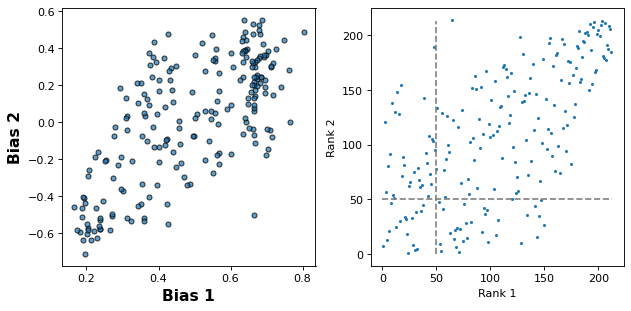

In [264]:
BiasCorrelation(ASD_Bias_MERFISH_MIT_CM_ZM, ASD_ISH)

(0.7098616926199647, 8.347978766345164e-34)


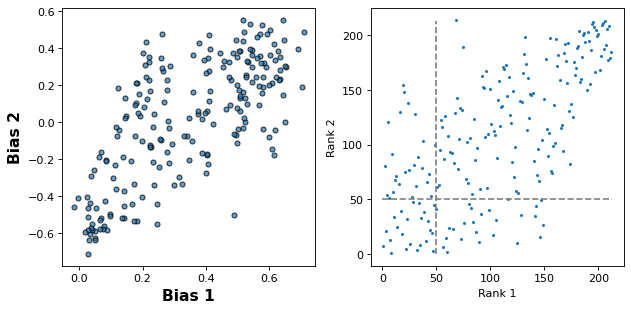

In [271]:
BiasCorrelation(ASD_Bias_MERFISH_MIT_CM_ZM_adj, ASD_ISH)

In [266]:
Bias1 = ASD_ISH
Bias2 = ASD_Bias_MERFISH_MIT_CM_ZM
STR_Com = len(set(Bias1.head(50).index.values).intersection(set(Bias2.head(50).index.values)))
STR_Com

18

In [267]:
Bias1 = ASD_ISH
Bias2 = ASD_Bias_MERFISH_MIT_CM_ZM_adj
STR_Com = len(set(Bias1.head(50).index.values).intersection(set(Bias2.head(50).index.values)))
STR_Com

26

In [272]:
ASD_Bias_MERFISH_Allen_CM_Zmatch = pd.read_csv("dat/Bias/MERFISH_STR_AggBias/ASD.MERFISH.Allen.CellMean.Zmatch.Z2.csv", index_col=0)
ASD_Bias_MERFISH_Allen_VM_Zmatch = pd.read_csv("dat/Bias/MERFISH_STR_AggBias/ASD.MERFISH.Allen.VolMean.Zmatch.Z2.csv", index_col=0)

(0.9367453271536973, 1.0610724749757132e-97)


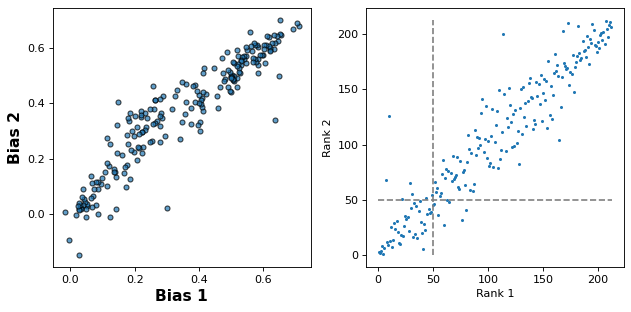

In [278]:
BiasCorrelation(ASD_Bias_MERFISH_MIT_CM_ZM_adj, ASD_Bias_MERFISH_Allen_VM_Zmatch)

In [280]:
Bias1 = ASD_Bias_MERFISH_MIT_CM_ZM_adj
Bias2 = ASD_Bias_MERFISH_Allen_VM_Zmatch
STR_Com = len(set(Bias1.head(50).index.values).intersection(set(Bias2.head(50).index.values)))
STR_Com

43

In [281]:
STR_MERFISH_Z2Mat_CM = pd.read_csv("dat/MERFISH_Zhuang/Z2Mat.ISH_STR.CellMean.SCMatch.csv", index_col=0)
STR_MERFISH_Z2Mat_VM = pd.read_csv("dat/MERFISH_Zhuang/Z2Mat.ISH_STR.VolMean.SCMatch.csv", index_col=0)
head = STR_MERFISH_Z2Mat_CM.columns.values
new_head = [X.replace(" ", "_") for X in head]
STR_MERFISH_Z2Mat_CM.columns = new_head
STR_MERFISH_Z2Mat_VM.columns = new_head

In [282]:
ASD_GW = Fil2Dict("../../ASD_Circuits/dat/Unionize_bias/Spark_Meta_EWS.GeneWeight.csv")
GeneExpCorr = pd.read_csv("dat/ISH_MERFISH_Gene_CorssSTR_Corr.v2.csv", index_col=0)
ASD_GW_adj = {}
for k,v in ASD_GW.items():
    if k in GeneExpCorr.index.values:
        ASD_GW_adj[k] = v * (GeneExpCorr.loc[k, "V2_V3_CT_Corr"]**2)

In [287]:
ASD_Bias_MERFISH_MIT_Z2_CM = AvgSTRZ_Weighted(STR_MERFISH_Z2Mat_CM, ASD_GW) 
ASD_Bias_MERFISH_MIT_Z2_VM = AvgSTRZ_Weighted(STR_MERFISH_Z2Mat_VM, ASD_GW) 

In [288]:
ASD_Bias_MERFISH_MIT_Z2_CM_adj = AvgSTRZ_Weighted(STR_MERFISH_Z2Mat_CM, ASD_GW_adj) 
ASD_Bias_MERFISH_MIT_Z2_VM_adj = AvgSTRZ_Weighted(STR_MERFISH_Z2Mat_VM, ASD_GW_adj) 

(0.36595187830442166, 4.055718423787088e-08)


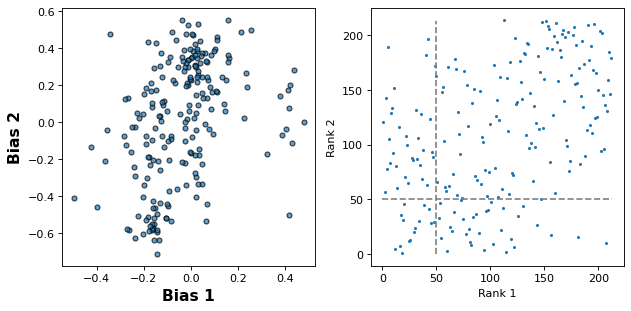

15

In [292]:
BiasCorrelation(ASD_Bias_MERFISH_MIT_Z2_VM, ASD_ISH)
Bias1 = ASD_ISH
Bias2 = ASD_Bias_MERFISH_MIT_Z2_VM
STR_Com = len(set(Bias1.head(50).index.values).intersection(set(Bias2.head(50).index.values)))
STR_Com

(0.5703799305402317, 1.082368920401923e-19)


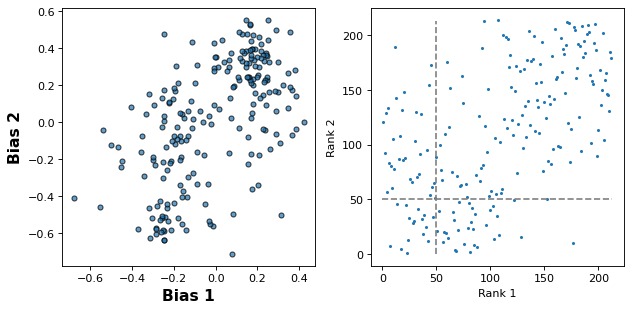

17

In [291]:
BiasCorrelation(ASD_Bias_MERFISH_MIT_Z2_VM_adj, ASD_ISH)
Bias1 = ASD_ISH
Bias2 = ASD_Bias_MERFISH_MIT_Z2_VM_adj
STR_Com = len(set(Bias1.head(50).index.values).intersection(set(Bias2.head(50).index.values)))
STR_Com

(0.5703799305402317, 1.082368920401923e-19)


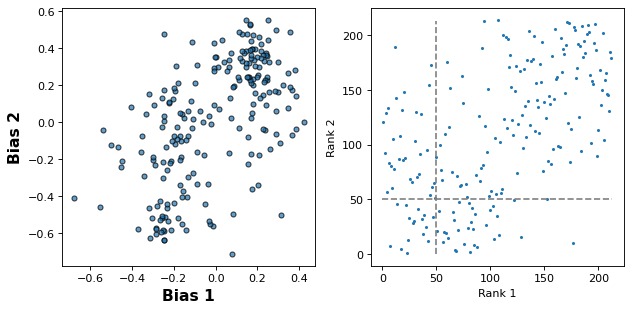

In [201]:
BiasCorrelation(ASD_Bias_MERFISH_STR_VM, ASD_ISH)

In [202]:
Bias1 = ASD_ISH
Bias2 = ASD_Bias_MERFISH_STR_VM
STR_Com = len(set(Bias1.head(50).index.values).intersection(set(Bias2.head(50).index.values)))
STR_Com

17

In [241]:
#ASD_Bias_MERFISH_STR_VM[ASD_Bias_MERFISH_STR_VM["REGION"]=="Thalamus"]

In [242]:
#ASD_Bias_MERFISH_STR_VM[ASD_Bias_MERFISH_STR_VM["REGION"]=="Isocortex"]

In [302]:
ASD_Bias_MERFISH_Allen_Z2_CM = pd.read_csv("dat/Bias/MERFISH_STR_AggBias/ASD.MERFISH.Allen.CellMean.Z2.csv", index_col=0)
ASD_Bias_MERFISH_Allen_Z2_VM = pd.read_csv("dat/Bias/MERFISH_STR_AggBias/ASD.MERFISH.Allen.VolMean.Z2.csv", index_col=0)
ASD_Bias_MERFISH_Allen_Z2_CM_adj = pd.read_csv("dat/Bias/MERFISH_STR_AggBias/ASD.MERFISH.Allen.CellMean.adj.Z2.csv", index_col=0)
ASD_Bias_MERFISH_Allen_Z2_VM_adj = pd.read_csv("dat/Bias/MERFISH_STR_AggBias/ASD.MERFISH.Allen.VolMean.adj.Z2.csv", index_col=0)

(0.835511982301591, 1.6072582639382115e-56)


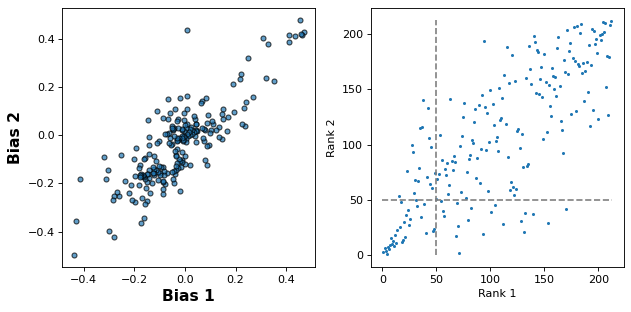

31

In [304]:
BiasCorrelation(ASD_Bias_MERFISH_Allen_Z2_VM, ASD_Bias_MERFISH_MIT_Z2_VM)
Bias1 = ASD_Bias_MERFISH_Allen_Z2_VM
Bias2 = ASD_Bias_MERFISH_MIT_Z2_VM
STR_Com = len(set(Bias1.head(50).index.values).intersection(set(Bias2.head(50).index.values)))
STR_Com

(0.8769388674926621, 9.36892210819283e-69)


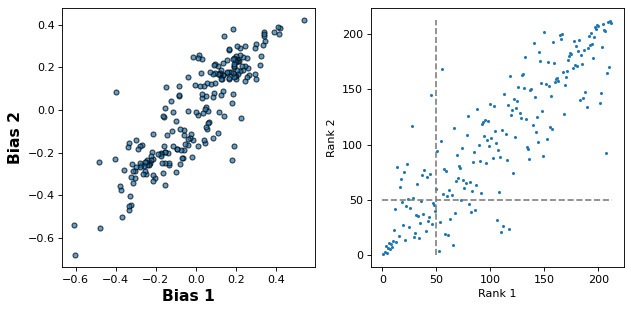

35

In [305]:
BiasCorrelation(ASD_Bias_MERFISH_Allen_Z2_VM_adj, ASD_Bias_MERFISH_MIT_Z2_VM_adj)
Bias1 = ASD_Bias_MERFISH_Allen_Z2_VM_adj
Bias2 = ASD_Bias_MERFISH_MIT_Z2_VM_adj
STR_Com = len(set(Bias1.head(50).index.values).intersection(set(Bias2.head(50).index.values)))
STR_Com

(0.772068053681599, 3.2453983893161315e-43)


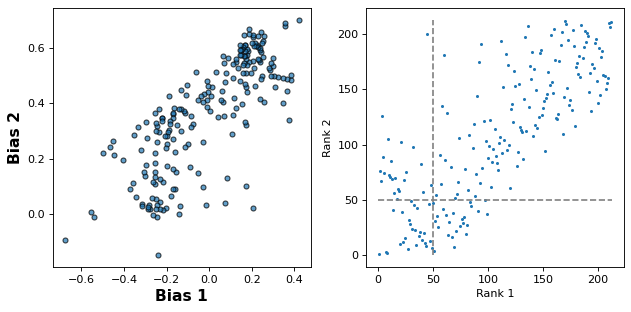

In [295]:
BiasCorrelation(ASD_Bias_MERFISH_STR_VM, ASD_Bias_MERFISH_Allen_VM_Zmatch)

(0.8355119823015911, 1.6072582639381203e-56)


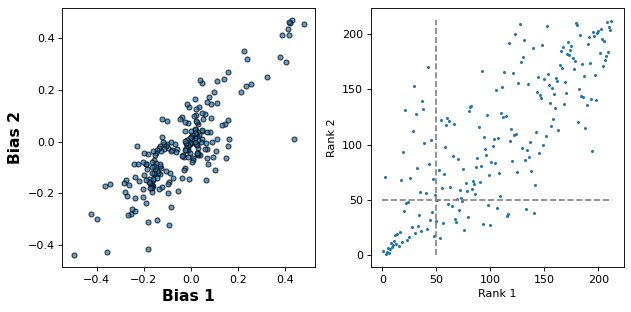

31

In [297]:
BiasCorrelation(ASD_Bias_MERFISH_MIT_Z2_VM, ASD_Bias_MERFISH_Allen_VM)
Bias1 = ASD_Bias_MERFISH_MIT_Z2_VM
Bias2 = ASD_Bias_MERFISH_Allen_VM
STR_Com = len(set(Bias1.head(50).index.values).intersection(set(Bias2.head(50).index.values)))
STR_Com

In [210]:
Bias1 = ASD_Bias_MERFISH_STR_VM
Bias2 = ASD_Bias_MERFISH_Allen_VM
STR_Com = len(set(Bias1.head(50).index.values).intersection(set(Bias2.head(50).index.values)))
STR_Com

35

In [220]:
MouseISH_Zmatch = pd.read_csv("dat/MERFISH/Z2Mat.ISH.Zmatch.csv", index_col=0)

In [312]:
MouseISH_Z1 = pd.read_csv("../../ASD_Circuits/dat/allen-mouse-exp/AllenMouse_z1_mat.0511.csv", index_col=0)

In [314]:
ASD_ISH_Z1 = AvgSTRZ_Weighted(MouseISH_Z1, ASD_GW) 
ASD_ISH_Z1 = FixSubiculum(ASD_ISH_Z1)

(0.9524627885056612, 2.296070411136828e-110)


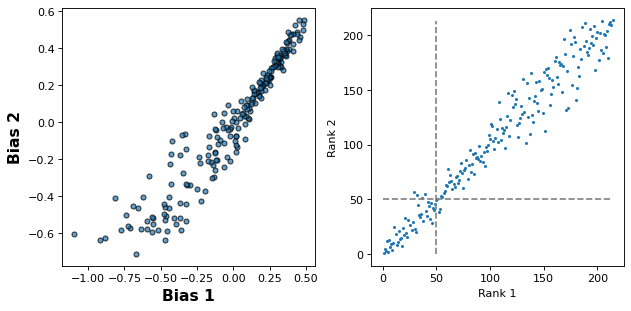

47

In [315]:
BiasCorrelation(ASD_ISH_Z1, ASD_ISH)
Bias1 = ASD_ISH_Z1
Bias2 = ASD_ISH
STR_Com = len(set(Bias1.head(50).index.values).intersection(set(Bias2.head(50).index.values)))
STR_Com

(0.9217561295968527, 2.3765040899465764e-88)


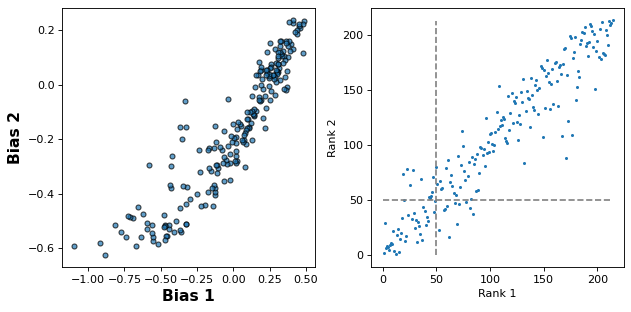

38

In [316]:
BiasCorrelation(ASD_ISH_Z1, ASD_ISH_v2)
Bias1 = ASD_ISH_Z1
Bias2 = ASD_ISH_v2
STR_Com = len(set(Bias1.head(50).index.values).intersection(set(Bias2.head(50).index.values)))
STR_Com

In [223]:
ASD_ISH_v2 = AvgSTRZ_Weighted(MouseISH_Zmatch, ASD_GW) 
ASD_ISH_v2_adj = AvgSTRZ_Weighted(MouseISH_Zmatch, ASD_GW_adj) 

In [234]:
def FixSubiculum(DF):
    X = DF.loc["Subiculum_dorsal_part"]
    Y = DF.loc["Subiculum_ventral_part"]
    Z = [(X[0]+Y[0])/2, "Hippocampus", 214]
    DF.loc["Subiculum"] = Z
    DF = DF.drop(["Subiculum_dorsal_part", "Subiculum_ventral_part"])
    return DF

In [235]:
ASD_ISH_v2 = FixSubiculum(ASD_ISH_v2)
ASD_ISH_v2_adj = FixSubiculum(ASD_ISH_v2_adj)

In [226]:
#ASD_ISH_v2.head(50)

In [227]:
#ASD_ISH_v2[ASD_ISH_v2["REGION"]=="Thalamus"]

In [301]:
print(RegionDistributionsList(ASD_ISH_v2.head(50).index.values))

Thalamus	7	Parafascicular_nucleus; Rhomboid_nucleus; Submedial_nucleus_of_the_thalamus; Nucleus_of_reuniens; Subparafascicular_nucleus_magnocellular_part; Ventral_posteromedial_nucleus_of_the_thalamus_parvicellular_part; Central_medial_nucleus_of_the_thalamus
Amygdala	3	Lateral_amygdalar_nucleus; Basomedial_amygdalar_nucleus; Basolateral_amygdalar_nucleus
Striatum	2	Nucleus_accumbens; Caudoputamen
Olfactory_areas	4	Dorsal_peduncular_area; Anterior_olfactory_nucleus; Accessory_olfactory_bulb; Postpiriform_transition_area
Isocortex	25	Anteromedial_visual_area; Primary_visual_area; Retrosplenial_area_lateral_agranular_part; Prelimbic_area; Orbital_area_lateral_part; Orbital_area_ventrolateral_part; Primary_somatosensory_area_lower_limb; posteromedial_visual_area; Visceral_area; Lateral_visual_area; Posterolateral_visual_area; Secondary_motor_area; Infralimbic_area; Posterior_parietal_association_areas; Orbital_area_medial_part; Anterior_cingulate_area_dorsal_part; Primary_somatosensory_ar

(0.9678782583195921, 6.887670827015765e-128)


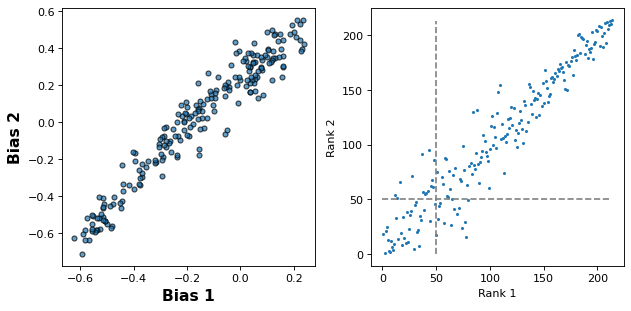

36

In [298]:
BiasCorrelation(ASD_ISH_v2, ASD_ISH)
Bias1 = ASD_ISH_v2
Bias2 = ASD_ISH
STR_Com = len(set(Bias1.head(50).index.values).intersection(set(Bias2.head(50).index.values)))
STR_Com

(0.9381955374602016, 1.0036242415215279e-98)


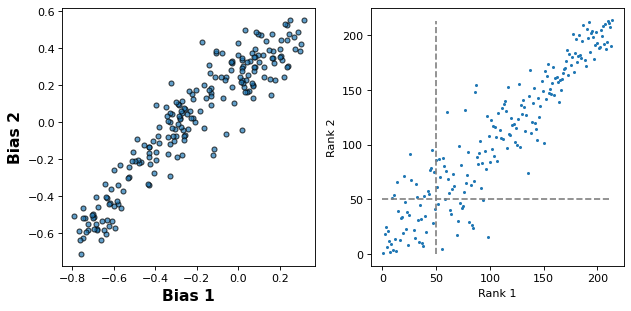

In [237]:
BiasCorrelation(ASD_ISH_v2_adj, ASD_ISH)

(0.7498494004010477, 1.54878815925137e-39)


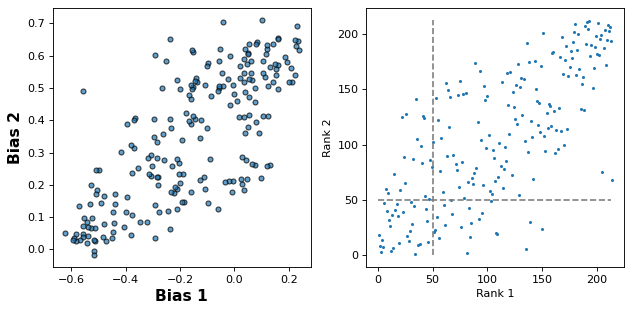

In [238]:
BiasCorrelation(ASD_ISH_v2, ASD_Bias_MERFISH_STR_VM_ZM)

(0.8030609878977124, 4.172267169212268e-49)


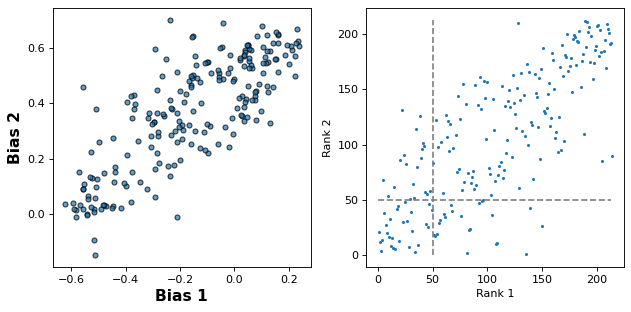

In [239]:
BiasCorrelation(ASD_ISH_v2, ASD_Bias_MERFISH_Allen_VM_Zmatch)

In [240]:
Bias1 = ASD_ISH_v2
Bias2 = ASD_Bias_MERFISH_Allen_VM_Zmatch
STR_Com = len(set(Bias1.head(50).index.values).intersection(set(Bias2.head(50).index.values)))
STR_Com

29

## Clean UP

In [ ]:
Merfish_Zhuang_Z2 = pd.read_csv("dat/MERFISH_Zhuang/Z2Mat.ISH_STR.VolMean.SCMatch.Zmatch.csv")


# Expression L Compare of 2 MERFISH dataset

In [3]:
MERFISH_Allen_STR_ExpL = pd.read_csv("dat/MERFISH/STR_Vol_Mean_DF.UMI.csv", index_col=0)
MERFISH_Zhuang_STR_ExpL = pd.read_csv("dat/MERFISH_Zhuang/STR_Vol_Mean_DF.UMI.csv", index_col=0)

In [4]:
MERFISH_Allen_STR_Z1 = pd.read_csv("dat/MERFISH/STR_Vol_Mean_Z1Mat.clip.csv", index_col=0)
MERFISH_Zhuang_STR_Z1 = pd.read_csv("dat/MERFISH_Zhuang/STR_Vol_Mean_Z1Mat.clip.csv", index_col=0)

In [7]:
GeneExpCorr = pd.read_csv("dat/ISH_MERFISH_Gene_CorssSTR_Corr.v2.csv", index_col=0)

In [8]:
GeneExpCorr.head(2)

,Corr,Symbol,ISH_exp,MERFISH_exp,V2_V3_CT_Corr
Genes,,,,,
27132,0.939306,CPNE7,2.433352,1.604471,0.731995
140885,0.929601,SIRPA,2.349709,4.576162,0.768766


In [9]:
for i, row in GeneExpCorr.iterrows():
    row1 = MERFISH_Allen_STR_ExpL.loc[i, :].values
    row2 = MERFISH_Zhuang_STR_ExpL.loc[i, :].values
    r, p = pearsonr(row1, row2) #, nan_policy="omit")
    GeneExpCorr.loc[i, "Two_MERFISH_STR_Corr"] = r

In [10]:
GeneExpCorr.to_csv("dat/ISH_MERFISH_Gene_CorssSTR_Corr.v3.csv")

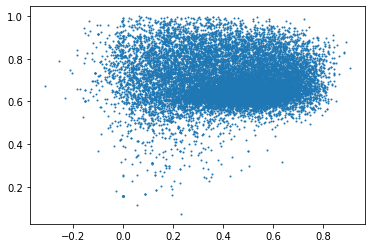

In [11]:
X = GeneExpCorr["V2_V3_CT_Corr"]
Y = GeneExpCorr["Two_MERFISH_STR_Corr"]
plt.scatter(X, Y, s=1)

##### Corss STRs

In [13]:
AllenMERFISH_MKExp = pd.read_csv("dat/MERFISH_MarkerG/STR_MERFISH_MarkerG.csv", index_col=0)

In [14]:
AllenMERFISH_MKGenes = AllenMERFISH_MKExp.index.values

In [15]:
len(AllenMERFISH_MKGenes)

488

In [16]:
Cross_STR_Rs = []
Cross_STR_Rs_MKG = []
for g, row in MERFISH_Allen_STR_ExpL.iterrows():
    row1 = row.values
    row2 = MERFISH_Zhuang_STR_ExpL.loc[g, :].values
    r, p = pearsonr(row1, row2) #, nan_policy="omit")
    Cross_STR_Rs.append(r)
    if g in AllenMERFISH_MKGenes:
        Cross_STR_Rs_MKG.append(r)

/home/jw3514/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


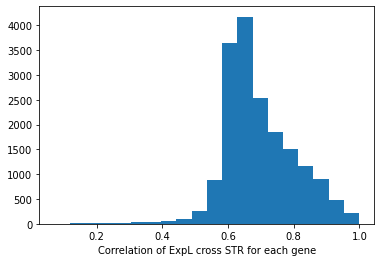

In [17]:
plt.hist(Cross_STR_Rs, bins=20)
plt.xlabel("Correlation of ExpL cross STR for each gene")
plt.show()

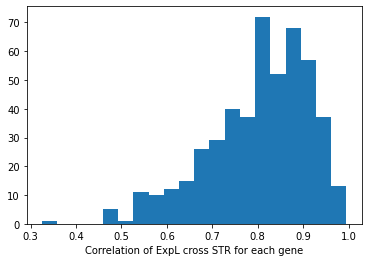

In [18]:
plt.hist(Cross_STR_Rs_MKG, bins=20)
plt.xlabel("Correlation of ExpL cross STR for each gene")
plt.show()

In [19]:
Cross_STR_Z1_Rs = []
for g, row in MERFISH_Allen_STR_Z1.iterrows():
    row1 = row.values
    row2 = MERFISH_Zhuang_STR_Z1.loc[g, :].values
    #r, p = pearsonr(row1, row2) #, nan_policy="omit")
    r, p = spearmanr(row1, row2, nan_policy="omit")
    Cross_STR_Z1_Rs.append(r)

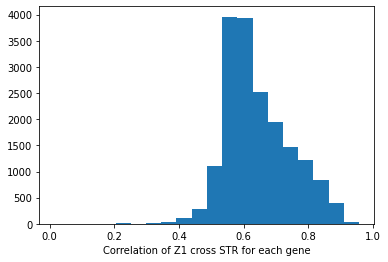

In [20]:
plt.hist(Cross_STR_Z1_Rs, bins=20)
plt.xlabel("Correlation of Z1 cross STR for each gene")
plt.show()

##### Cross genes Per STR

In [21]:
STR_Cross_Gene_Exp_Rs = []
#STR_Cross_Gene_Exp_Rs = []
for STR in MERFISH_Allen_STR_ExpL.columns.values:
    row1 = MERFISH_Allen_STR_ExpL[STR].values
    row2 = MERFISH_Zhuang_STR_ExpL[STR].values
    r, p = pearsonr(row1, row2) #, nan_policy="omit")
    STR_Cross_Gene_Exp_Rs.append(r)

In [22]:
print(np.mean(STR_Cross_Gene_Exp_Rs))
print(np.median(STR_Cross_Gene_Exp_Rs))

0.9920044862819719
0.9946466023140896


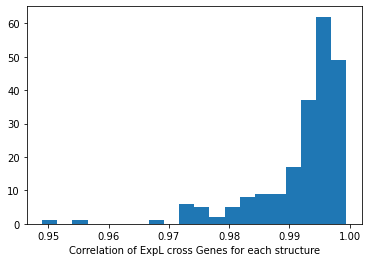

In [23]:
#plt.hist(Cross_STR_Rs, bins=20, label="ExpL Cross STR")
#plt.hist(Cross_STR_Z1_Rs, bins=20, label="Z1 Cross STR")
plt.hist(STR_Cross_Gene_Exp_Rs, bins=20, label="Exp Cross Genes")

plt.xlabel("Correlation of ExpL cross Genes for each structure")
plt.show()

In [24]:
df = pd.DataFrame(data={"STR":MERFISH_Allen_STR_ExpL.columns.values, "GeneCorr":STR_Cross_Gene_Exp_Rs})

In [25]:
df = df.sort_values("GeneCorr")

In [26]:
df.head(50)

,STR,GeneCorr
113,Rhomboid nucleus,0.948928
107,Intermediodorsal nucleus of the thalamus,0.955866
101,Posterior limiting nucleus of the thalamus,0.968649
97,Medial geniculate complex medial part,0.971720
109,Submedial nucleus of the thalamus,0.971815
115,Central lateral nucleus of the thalamus,0.972138
114,Central medial nucleus of the thalamus,0.973008
108,Mediodorsal nucleus of thalamus,0.973715
95,Medial geniculate complex dorsal part,0.974172
112,Nucleus of reuniens,0.975099


In [27]:
df.tail(50)

,STR,GeneCorr
74,Anterior amygdalar area,0.996900
151,Anterior pretectal nucleus,0.996946
34,Posterior parietal association areas,0.996987
6,Primary somatosensory area mouth,0.996996
17,Lateral visual area,0.997018
132,Medial preoptic nucleus,0.997041
196,Spinal vestibular nucleus,0.997169
210,Interposed nucleus,0.997195
203,Nodulus X,0.997213
131,Supramammillary nucleus,0.997219


## Compare Cell composition of 2 merfish

In [29]:
MERFISH_Allen = pd.read_csv("dat/MERFISH/MERFISH.ISH_Annot.clean.csv", index_col=0)

In [30]:
MERFISH_MIT = pd.read_csv("dat/MERFISH_Zhuang/MERFISH_Zhuang_1-4_Combine.STR.Annot.csv", index_col=0)

In [32]:
MERFISH_Allen.columns.values

array(['brain_section_label', 'cluster_alias',
       'average_correlation_score', 'feature_matrix_label', 'donor_label',
       'donor_genotype', 'donor_sex', 'x_section', 'y_section',
       'z_section', 'neurotransmitter', 'class', 'subclass', 'supertype',
       'cluster', 'neurotransmitter_color', 'class_color',
       'subclass_color', 'supertype_color', 'cluster_color',
       'x_reconstructed', 'y_reconstructed', 'z_reconstructed',
       'parcellation_index', 'x_ccf', 'y_ccf', 'z_ccf',
       'parcellation_organ', 'parcellation_category',
       'parcellation_division', 'parcellation_structure',
       'parcellation_substructure', 'parcellation_organ_color',
       'parcellation_category_color', 'parcellation_division_color',
       'parcellation_structure_color', 'parcellation_substructure_color',
       'ISH_STR'], dtype=object)

In [34]:
ISH_STRs = set(MERFISH_Allen["ISH_STR"])

In [ ]:
def GetBiasesForSTR(STR, MERFISH_STRAnn, ASD_CT_Bias_Cluster, CT_ID_SET, Non_Neuron_Class):
    STR_MERFISH_DF = MERFISH_STRAnn[MERFISH_STRAnn["ISH_STR"]==STR]
    total_bias = 0
    total_bias_neuro = 0
    N_cell = 0
    N_neuro = 0
    for i, row in STR_MERFISH_DF.iterrows():
        cluster_id = row["cluster"]
        if cluster_id not in CT_ID_SET:
            continue
        class_id = row["class"]
        asd_cluster_bias = ASD_CT_Bias_Cluster.loc[cluster_id, "EFFECT"]
        if asd_cluster_bias == asd_cluster_bias:
            total_bias += asd_cluster_bias
            N_cell += 1
            if class_id not in Non_Neuron_Class:
                total_bias_neuro += asd_cluster_bias
                N_neuro += 1
    if N_cell > 0:
        bias_per_cell = total_bias/N_cell
    else:
        bias_per_cell = 0
    if N_neuro > 0:
        bias_per_neuro = total_bias_neuro/N_neuro
    else:
        bias_per_neuro = 0
    Vol = CCF_V3_STR.loc[STR, "total_voxel_counts (10 um)"]
    bias_per_Vol = total_bias/Vol * 100
    return bias_per_cell, bias_per_neuro, bias_per_Vol

In [57]:
N_Cell_Allen = []
N_Cell_MIT = []
ISH_STRs_Name = []
for STR in ISH_STRs:
    if STR == 'Not in Connectome':
        continue
    STR_name = "_".join(STR.split())
    STR_MERFISH_Allen = MERFISH_Allen[MERFISH_Allen["ISH_STR"]==STR]
    STR_MERFISH_MIT = MERFISH_MIT[MERFISH_MIT["ISH_STR"]==STR]
    #print("STR:{} Allen:{} MIT:{}".format(STR, STR_MERFISH_Allen.shape[0], STR_MERFISH_MIT.shape[0]))
    ISH_STRs_Name.append(STR_name)
    N_Cell_Allen.append(STR_MERFISH_Allen.shape[0])
    N_Cell_MIT.append(STR_MERFISH_MIT.shape[0])

In [58]:
ASD_ISH =  pd.read_csv("/home/jw3514/Work/ASD_Circuits/dat/Unionize_bias/Spark_Meta_EWS.Z2.bias.csv", 
                               index_col=0)
ASD_ISH = FixSubiculum(ASD_ISH)
ASD_ISH["REGION"] = ASD_ISH["REGION"].replace("Amygdalar", "Amygdala")

In [59]:
df = pd.DataFrame(data={"STR":ISH_STRs_Name, "N_Cell_Allen":N_Cell_Allen, "N_Cell_MIT":N_Cell_MIT})

In [61]:
Regions = [ASD_ISH.loc[X, "REGION"] for X in ISH_STRs_Name]

In [63]:
df["Region"] = Regions 

In [66]:
df = df.set_index("STR")

In [67]:
df.head(2)

,N_Cell_Allen,N_Cell_MIT,Region
STR,,,
Inferior_colliculus_central_nucleus,11880,19759,Midbrain
Anteromedial_visual_area,8729,6462,Isocortex


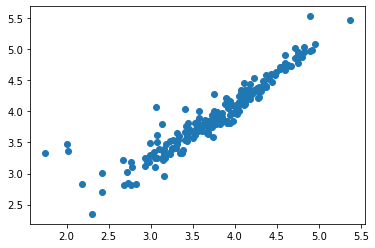

In [70]:
plt.scatter(np.log10(df["N_Cell_Allen"].values), np.log10(df["N_Cell_MIT"].values))

In [40]:
STR = "Mediodorsal nucleus of thalamus"
STR_MERFISH_Allen = MERFISH_Allen[MERFISH_Allen["ISH_STR"]==STR]
STR_MERFISH_MIT = MERFISH_MIT[MERFISH_MIT["ISH_STR"]==STR]
print("STR:{} Allen:{} MIT:{}".format(STR, STR_MERFISH_Allen.shape[0], STR_MERFISH_MIT.shape[0]))

STR:Mediodorsal nucleus of thalamus Allen:9656 MIT:9436


In [46]:
set(STR_MERFISH_Allen["class"])

{'01 IT-ET Glut',
 '02 NP-CT-L6b Glut',
 '03 OB-CR Glut',
 '05 OB-IMN GABA',
 '06 CTX-CGE GABA',
 '07 CTX-MGE GABA',
 '08 CNU-MGE GABA',
 '09 CNU-LGE GABA',
 '11 CNU-HYa GABA',
 '13 CNU-HYa Glut',
 '30 Astro-Epen',
 '31 OPC-Oligo',
 '33 Vascular',
 '34 Immune'}

# Figure out expl cal diff

In [6]:
MERFISH = pd.read_csv("/home/jw3514/Work/CellType_Psy/AllenBrainCellAtlas/dat/MERFISH/MERFISH.ISH_Annot.clean.csv", index_col=0)
Cluster_V3_Exp = pd.read_csv("/home/jw3514/Work/CellType_Psy/AllenBrainCellAtlas/dat/SC_UMI_Mats/cluster_MeanLogUMI.csv", index_col=0)

In [24]:
Non_Neuron_Class = ["30 Astro-Epen","31 OPC-Oligo","32 OEC","33 Vascular","34 Immune"]

In [25]:
STR = "Superior vestibular nucleus"
MERFISH_STR = MERFISH[MERFISH["ISH_STR"]==STR]
MERFISH_STR_Neur = MERFISH_STR[~MERFISH_STR["class"].isin(Non_Neuron_Class)]

In [18]:
test = MERFISH_STR[MERFISH_STR["cluster"]=="3464 SNr Six3 Gaba_1"]

In [20]:
test.shape

(47, 38)

In [26]:
cluster_counts = MERFISH_STR_Neur['cluster'].value_counts()
cluster_counts_df = cluster_counts.reset_index()
cluster_counts_df.columns = ['Cluster', 'Count']

In [28]:
gene = 481

In [30]:
for i, row in cluster_counts_df.iterrows():
    cluster_counts_df.loc[i, "exp"] = Cluster_V3_Exp.loc[gene, row["Cluster"]]

In [31]:
cluster_counts_df

,Cluster,Count,exp
0,3464 SNr Six3 Gaba_1,47,7.257153
1,4561 VCO Mafa Meis2 Glut_2,43,7.277120
2,4521 CBN Neurod2 Pvalb Glut_1,37,5.846542
3,4935 MV-SPIV-PRP Dmbx1 Gly-Gaba_1,24,6.593847
4,4999 MV Pax6 Gly-Gaba_2,23,6.461407
...,...,...,...
61,4878 MY Lhx1 Gly-Gaba_2,1,6.522885
62,4420 SPVI-SPVC Tlx3 Ebf3 Glut_2,1,5.028480
63,4612 CS-RPO Meis2 Gaba_1,1,5.109227
64,4949 MV-SPIV-PRP Dmbx1 Gly-Gaba_3,1,5.594593


In [43]:
weighted_exp = (cluster_counts_df['exp'] * cluster_counts_df['Count']).sum() / cluster_counts_df['Count'].sum()

In [56]:
(cluster_counts_df['exp'] * cluster_counts_df['Count']).sum()

2440.026987617734

In [44]:
weighted_exp

6.0848553307175415

In [54]:
cluster_counts_df['Count'].sum()

401

In [40]:
JC_cluster_counts = pd.read_csv("dat/JonDat/Debug_STR_CellComp.csv", index_col=0)
JC_cluster_counts = JC_cluster_counts.sort_values("n", ascending=False)
JC_cluster_counts = JC_cluster_counts[JC_cluster_counts["exp"]!="NaN"]

In [41]:
JC_cluster_counts

,ind.str,ind.cell,n,exp
48134,Superior_vestibular_nucleus,5285 MOL NN_4,484,NaN
48133,Superior_vestibular_nucleus,5284 MOL NN_4,431,NaN
48117,Superior_vestibular_nucleus,5217 Astro-NT NN_2,307,NaN
48145,Superior_vestibular_nucleus,5310 Endo NN_1,266,NaN
48116,Superior_vestibular_nucleus,5216 Astro-NT NN_2,176,NaN
...,...,...,...,...
48079,Superior_vestibular_nucleus,4612 CS-RPO Meis2 Gaba_1,1,5.109227
48077,Superior_vestibular_nucleus,4548 NTS Dbh Glut_4,1,7.292396
48127,Superior_vestibular_nucleus,5276 COP NN_1,1,NaN
48071,Superior_vestibular_nucleus,4515 MV-SPIV Zic4 Neurod2 Glut_5,1,4.799886


In [67]:
gene_idx = np.where(Cluster_V3_Exp.index.values==gene)[0][0]
gene_idx

853

In [74]:
MERFISH_STR = MERFISH[MERFISH["ISH_STR"]==STR]

print("Processing {}; No.Cells:{}".format(STR, MERFISH_STR.shape[0]))
str_cell_sum_exp = np.zeros(Cluster_V3_Exp.shape[0])
str_neuro_sum_exp = np.zeros(Cluster_V3_Exp.shape[0])
str_neuro_count = 0 
neuro_type_dict = {}
neuro_type_gene_total_exp = 0
for i, row in MERFISH_STR.iterrows():
    cluster = row["cluster"]
    cell_class = row["class"]
    if cluster in Cluster_V3_Exp.columns.values:
        cell_exp = Cluster_V3_Exp[cluster].values
        #cell_exp = np.nan_to_num(cell_exp, nan=0)
        str_cell_sum_exp += cell_exp
        if cell_class not in Non_Neuron_Class:
            str_neuro_sum_exp += cell_exp
            str_neuro_count += 1
            neuro_type_gene_total_exp += cell_exp[gene_idx]
            if cluster not in neuro_type_dict:
                neuro_type_dict[cluster] = [1, cell_exp[gene_idx]]
            else:
                neuro_type_dict[cluster][0] += 1
if MERFISH_STR.shape[0] == 0:
    cell_avg_exp = str_cell_sum_exp
    neuro_avg_exp = str_neuro_sum_exp
else:
    cell_avg_exp = str_cell_sum_exp / MERFISH_STR.shape[0]
    neuro_avg_exp = str_neuro_sum_exp / str_neuro_count

Processing Superior vestibular nucleus; No.Cells:2597


In [80]:
print(MERFISH_STR.shape[0], str_neuro_count)

2597 401


In [75]:
neuro_type_gene_total_exp

2440.0269876177363

In [69]:
neuro_type_dict

{'4561 VCO Mafa Meis2 Glut_2': [43, 7.277120412929576],
 '4402 PGRN-PARN-MDRN Hoxb5 Glut_7': [7, 5.8208099640331135],
 '4198 PG-TRN-LRN Fat2 Glut_1': [5, 6.177691297065722],
 '4200 PG-TRN-LRN Fat2 Glut_1': [1, 5.960368361500289],
 '5175 DCO Il22 Gly-Gaba_3': [1, 5.188935798092312],
 '5183 CB PLI Gly-Gaba_3': [3, 5.314634350356681],
 '5174 DCO Il22 Gly-Gaba_3': [6, 5.300528707431973],
 '5176 DCO Il22 Gly-Gaba_3': [9, 6.689434549385259],
 '4925 MY Lhx1 Gly-Gaba_8': [7, 5.887274966310343],
 '4941 MV-SPIV-PRP Dmbx1 Gly-Gaba_1': [3, 5.976549708880401],
 '3464 SNr Six3 Gaba_1': [47, 7.257153429225832],
 '5185 CB PLI Gly-Gaba_4': [2, 2.6691614414362506],
 '5180 CB PLI Gly-Gaba_2': [2, 4.866617070418792],
 '5177 CB PLI Gly-Gaba_1': [19, 4.686203313180671],
 '5178 CB PLI Gly-Gaba_1': [3, 4.176728805308449],
 '4935 MV-SPIV-PRP Dmbx1 Gly-Gaba_1': [24, 6.593846883079757],
 '4977 MV Nkx6-1 Gly-Gaba_2': [3, 6.266302464293911],
 '5000 CBN Dmbx1 Gaba_1': [21, 4.5733878282520255],
 '4949 MV-SPIV-PRP Dm

In [72]:
exp_sum = 0
for k, v in neuro_type_dict.items():
    v1, v2 = v
    exp_sum += v1 * v2

In [76]:
exp_sum / str_neuro_count

6.084855330717542

In [61]:
str_neuro_sum_exp

array([1532.18244206,    9.16311056,    5.64050482, ..., 1912.09160458,
        807.8998545 , 2699.80017192])

In [62]:
str_neuro_count

401

In [77]:
neuro_avg_exp

array([3.82090385, 0.02285065, 0.0140661 , ..., 4.76830824, 2.01471285,
       6.73266876])

In [83]:
str_neuro_sum_exp[gene_idx]

2440.0269876177363

In [103]:
neuro_avg_exp_df = pd.DataFrame(data={"Gene":Cluster_V3_Exp.index.values, "exp":neuro_avg_exp, 
                                      "Neuro.sum.exp":str_neuro_sum_exp})
neuro_avg_exp_df = neuro_avg_exp_df.set_index("Gene")

In [88]:
gene

481

In [102]:
neuro_avg_exp_df.head(2)

,Gene,exp,Neuro.sum.exp
0,114786,3.820904,1532.182442
1,6101,0.022851,9.163111


In [105]:
neuro_avg_exp_df.loc[481, :]

exp                 6.084855
Neuro.sum.exp    2440.026988
Name: 481, dtype: float64

In [86]:
np.where(str_neuro_sum_exp==681.655797)

(array([], dtype=int64),)

In [87]:
for i, row in neuro_avg_exp_df.iterrows():
    total_exp = row["Neuro.sum.exp"]
    if total_exp > 2440 and total_exp < 2440.1:
        print(i, row)

853 Gene              481.000000
exp                 6.084855
Neuro.sum.exp    2440.026988
Name: 853, dtype: float64


In [98]:
df = pd.read_csv("dat/MERFISH/STR_NEU_Mean_DF.UMI.csv", index_col=0)
df2 = pd.read_csv("dat/MERFISH/STR_Cell_Mean_DF.UMI.csv", index_col=0)
df3 = pd.read_csv("dat/MERFISH/STR_Vol_Mean_DF.UMI.csv", index_col=0)

In [94]:
df.loc[gene, STR]

6.084855330717547

In [96]:
df2.loc[gene, STR]

1.954221952467568

In [99]:
df3.loc[gene, STR]

0.0143488846589375